==================================================================

**Example code to read two catalogs (Demp HSC photoz and QUAIA) from two fits files,
converting them to Hipscat, reading back with LSDB and crossmatching by position. Then we explore the matches to check their photozs, etc, etc.**

==================================================================

In [1]:
import numpy as np
from hipscat_import.catalog.arguments import ImportArguments
from dask.distributed import Client
from hipscat_import.pipeline import pipeline_with_client
from hipscat_import.catalog.file_readers import FitsReader
from pathlib import Path
import lsdb
from astropy.table import Table
import matplotlib.pyplot as plt

## Hipscatting HSC_PhotoZ Catalog

In [2]:
RA_COLUMN = "ra"
DEC_COLUMN = "dec"
# single fits file here, but keep it as a list in case there are multiple files
input_file_list = sorted(Path("/ocean/projects/phy210048p/shared/hscpz/demp_point/").glob('demp_merged.fits'))

In [3]:
args = ImportArguments(
    ra_column=RA_COLUMN,
    dec_column=DEC_COLUMN,
    input_file_list=input_file_list,
    file_reader=FitsReader(),
    output_artifact_name="demp",
    output_path="/ocean/projects/phy210048p/shared/hscpz_quaia_cross",
    resume=False,
)

Planning  :   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
# As it is, takes about 45 minutes
with Client(n_workers=4) as client:
    pipeline_with_client(args, client)

Mapping   :   0%|          | 0/1 [00:00<?, ?it/s]

Binning   :   0%|          | 0/2 [00:00<?, ?it/s]

Splitting :   0%|          | 0/1 [00:00<?, ?it/s]

Reducing  :   0%|          | 0/1504 [00:00<?, ?it/s]

Finishing :   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
list(lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hscpz_quaia_cross/demp").columns)

['object_id',
 'photoz_best',
 'photoz_conf_best',
 'photoz_risk_best',
 'stellar_mass',
 'sfr',
 'ra',
 'dec',
 'Norder',
 'Dir',
 'Npix']

## Hipscatting QUAIA

In [7]:
RA_COLUMN = "ra"
DEC_COLUMN = "dec"
# single fits file here, but keep it as a list in case there are multiple files
input_file_list = sorted(Path("/ocean/projects/phy210048p/shared/hipscat/raw/quaia/").glob('quaia_G20.5.fits'))

In [8]:
args = ImportArguments(
    ra_column=RA_COLUMN,
    dec_column=DEC_COLUMN,
    input_file_list=input_file_list,
    file_reader=FitsReader(),
    output_artifact_name="quaia",
    output_path="/ocean/projects/phy210048p/shared/hscpz_quaia_cross",
    resume=False,
)

Planning  :   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
with Client(n_workers=4) as client:
    pipeline_with_client(args, client)

Mapping   :   0%|          | 0/1 [00:00<?, ?it/s]

Binning   :   0%|          | 0/2 [00:00<?, ?it/s]

Splitting :   0%|          | 0/1 [00:00<?, ?it/s]

Reducing  :   0%|          | 0/12 [00:00<?, ?it/s]

Finishing :   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
list(lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hscpz_quaia_cross/quaia").columns)

['source_id',
 'unwise_objid',
 'redshift_quaia',
 'redshift_quaia_err',
 'ra',
 'dec',
 'l',
 'b',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'mag_w1_vg',
 'mag_w2_vg',
 'pm',
 'pmra',
 'pmdec',
 'pmra_error',
 'pmdec_error',
 'Norder',
 'Dir',
 'Npix']

## Read hipscatted HSC_PhotoZ using LSDB

In [14]:
cat = lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hscpz_quaia_cross/demp")

### Example cone search

In [12]:
qq=cat.cone_search(ra=0.0, dec=0.0, radius_arcsec=12).compute()

In [13]:
qq

,object_id,photoz_best,photoz_conf_best,photoz_risk_best,stellar_mass,sfr,ra,dec,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,
4899916391991214080,40576961227021774,2.87,0.138417,0.458512,9.023,0.645,0.001135,-0.002258,1,0,16
4899916392112848896,40576961227021776,2.24,0.056634,0.661668,10.111,0.048999,0.000833,-0.002092,1,0,16
4899916393027207168,40576961227002329,1.17,0.470852,0.09377,9.217,0.712,359.997874,-0.002489,1,0,16
4899916393400500224,40576961227002375,0.5,0.137209,0.508478,8.827,0.715,359.99847,-0.001624,1,0,16
4899916393622798336,40576961227021775,2.16,0.044201,0.707705,9.607,0.528,0.000356,-0.001719,1,0,16
4899916393647964160,40576961227002360,0.51,0.203435,0.459397,8.364,-1.138,359.999496,-0.001893,1,0,16
5092069979289812992,41645652169462222,1.24,0.367229,0.175684,10.193,-0.209,0.002775,0.00093,6,10000,18090
5476377147385839616,41645652169482272,1.19,0.200945,0.36849,8.588,1.05,0.000513,0.001315,6,10000,19456
5476377148107259904,41645652169482274,2.65,0.089587,0.577218,8.9,0.73,0.001214,0.001622,6,10000,19456


## Read hipscatted QUAIA using LSDB

In [15]:
cat2 = lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hscpz_quaia_cross/quaia")

## Crossmatch HSC_PhotoZ and QUAIA

In [16]:
matches = cat.crossmatch(cat2, radius_arcsec=1).compute()

/jet/home/edonoso/.conda/envs/lsdb_env/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:108: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


In [17]:
matches

,object_id_demp,photoz_best_demp,photoz_conf_best_demp,photoz_risk_best_demp,stellar_mass_demp,sfr_demp,ra_demp,dec_demp,Norder_demp,Dir_demp,...,mag_w2_vg_quaia,pm_quaia,pmra_quaia,pmdec_quaia,pmra_error_quaia,pmdec_error_quaia,Norder_quaia,Dir_quaia,Npix_quaia,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
36064350376558592,44956981760361046,0.43,0.344248,0.179562,10.542,0.815,39.239668,4.968537,0,0,...,15.819757,2.015931,1.887793,-0.707259,1.470602,1.578008,0,0,0,0.01987
36066021957697536,44956981760361658,0.2,0.63032,0.098235,10.486,-0.211,39.24908,5.024899,0,0,...,14.951512,1.509349,-1.308528,-0.752257,0.699502,0.612491,0,0,0,0.033159
36207684315250688,44957265228203857,0.21,0.451591,0.095838,10.73,0.253,38.780585,5.309515,0,0,...,15.467056,0.299155,-0.246929,-0.168877,0.605865,0.468682,0,0,0,0.01283
1152926402048163840,42045603819046867,2.69,0.404022,0.19527,9.15,1.94,135.116993,0.118346,6,0,...,16.450619,0.472389,-0.124633,-0.455651,0.665678,0.410765,0,0,1,0.006385
1152929798868172800,42045741258005110,0.84,0.33858,0.3856,10.523,0.965,135.059348,0.178171,6,0,...,14.603481,1.603647,1.229045,1.030113,0.91108,0.46375,0,0,1,0.008416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682104142286553088,41245730584680996,1.94,0.792152,0.044443,9.171,1.2,224.763577,-0.382351,6,40000,...,15.373639,0.140871,-0.06637,-0.124256,0.311057,0.236381,0,0,10,0.010583
12682113988297752576,41245734879644826,0.46,0.478186,0.101867,9.365,-2.368,224.749813,-0.251209,6,40000,...,12.625408,0.693401,-0.348245,0.599609,0.32136,0.278343,0,0,10,0.008578
12682117123342860288,41245734879646287,1.85,0.172747,0.336619,9.535,0.52,224.816963,-0.2256,6,40000,...,14.830626,0.330143,0.110725,-0.311021,0.287177,0.257211,0,0,10,0.010084


In [18]:
# Save matches to disk
matches.to_csv('/ocean/projects/phy210048p/shared/hscpz_quaia_cross/matches.csv')

## Explore matched data

In [19]:
risklim = 1.0  # we should lower this later
matched_cleanrisk = matches[matches['photoz_risk_best_demp']<risklim]

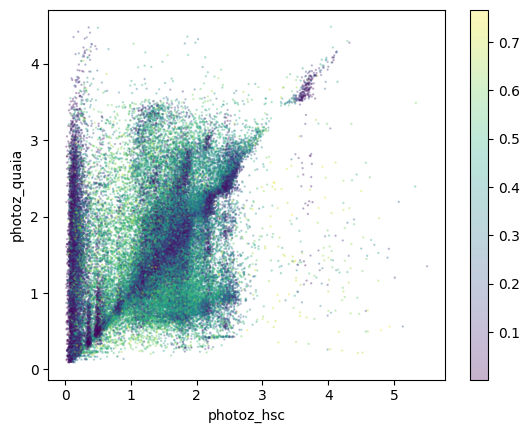

In [20]:
pp = plt.scatter(matched_cleanrisk['photoz_best_demp'], matched_cleanrisk['redshift_quaia_quaia'], s=0.5, alpha=0.3, c=matched_cleanrisk['photoz_risk_best_demp'], cmap='viridis')
plt.xlabel('photoz_hsc'); plt.ylabel('photoz_quaia');
plt.colorbar(pp)

**The large plume extending upwards at photoz_hsc~0.1 is due to sources of point morphology that have very few HSC bands available (eg. only g-magnitudes) and therefore very odd redshifts. This means the galaxy catalog fed to corrigi should be initially filtered at the very least by 15 < ugrizy_mag < 30 and 0.001<photoz_HSC<6 and risk<0.5 and [further cuts??]**